In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
!head -n 10 /home/kyohei/pydata-book/ch02/names/yob1880.txt

In [5]:
years = range(1880,2011)

pieces = []
columns = ['name','sex','births']

for year in years:
    path = '/home/kyohei/pydata-book/ch02/names/yob%d.txt' %year
    frame = pd.read_csv(path,names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces,ignore_index=True)

In [6]:
names.head()

name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880

In [7]:
total_births = names.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [8]:
total_births.tail()

sex         F        M
year                  
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382

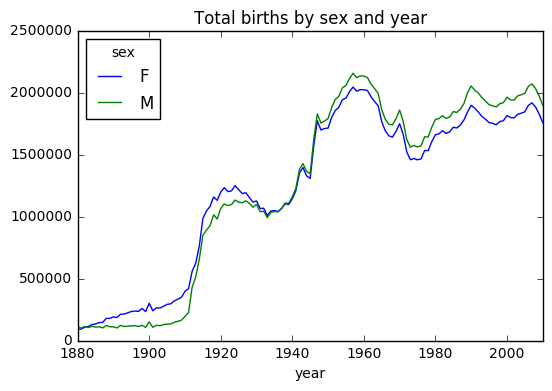

In [9]:
total_births.plot(title='Total births by sex and year')

In [10]:
def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year','sex']).apply(add_prop)

In [11]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [15]:
def get_top1000(group):
    return group.sort_index(by='births',ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [20]:
pieces = []
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_index(by='births',ascending=False)[:1000])
top1000 = pd.concat(pieces,ignore_index=True)

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [29]:
top1000.shape

(261877, 5)

In [30]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex=='F']

In [31]:
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

In [32]:
total_births.head()

name  Aaden  Aaliyah  Aarav  Aaron  Aarush  Ab  Abagail  Abb  Abbey  Abbie  \
year                                                                         
1880    NaN      NaN    NaN  102.0     NaN NaN      NaN  NaN    NaN   71.0   
1881    NaN      NaN    NaN   94.0     NaN NaN      NaN  NaN    NaN   81.0   
1882    NaN      NaN    NaN   85.0     NaN NaN      NaN  NaN    NaN   80.0   
1883    NaN      NaN    NaN  105.0     NaN NaN      NaN  NaN    NaN   79.0   
1884    NaN      NaN    NaN   97.0     NaN NaN      NaN  NaN    NaN   98.0   

name  ...    Zoa   Zoe  Zoey  Zoie  Zola  Zollie  Zona  Zora  Zula  Zuri  
year  ...                                                                 
1880  ...    8.0  23.0   NaN   NaN   7.0     NaN   8.0  28.0  27.0   NaN  
1881  ...    NaN  22.0   NaN   NaN  10.0     NaN   9.0  21.0  27.0   NaN  
1882  ...    8.0  25.0   NaN   NaN   9.0     NaN  17.0  32.0  21.0   NaN  
1883  ...    NaN  23.0   NaN   NaN  10.0     NaN  11.0  35.0  25.0   NaN  
1884  ...   13.0  31.0   NaN   NaN  14.0     6.0   8.0  58.0  27.0   NaN  

[5 rows x 6868 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f44c5820a10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f44c55cd110>], dtype=object)

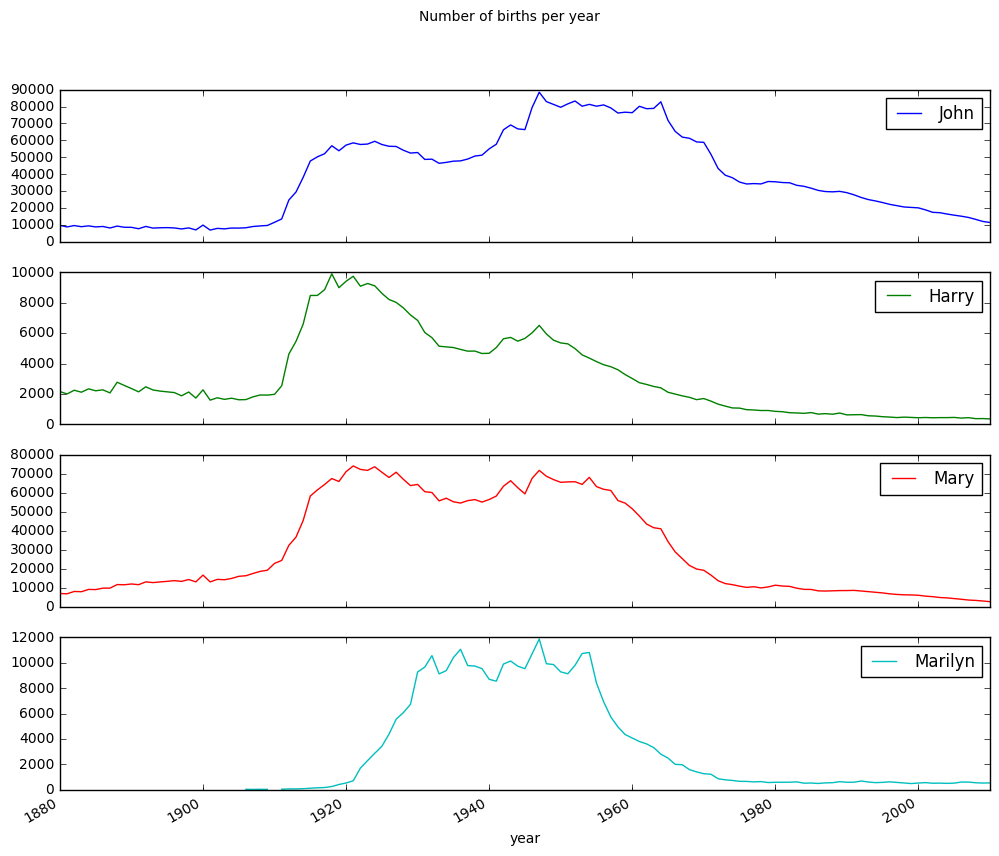

In [33]:
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')